In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import pickle
import lzma
import matplotlib.pyplot as plt
import csv
import h5py
from tqdm import tqdm
sys.path.insert(0, os.path.abspath('/home/suryakalia/documents/summer/exploration/kasthurilab_connectomics/'))
# Need to add above path since VSCode Jupyter Notebook doesn't respect system's $PYTHONPATH variable
# This will be eliminated once my module is converted to a conda package and installed to the conda env

import numpy as np
import cloudvolume
from cloudvolume import CloudVolume
from cloudvolume.lib import Bbox
import cv2
import lzma
import pickle
import tifffile

In [16]:
f = h5py.File("/scratch/midway3/suryakalia/datasets/hanyu/train_data_v2.h5", 'r')
image = np.array(f["image"])

In [17]:
print(image.shape)

(160, 1024, 1024)


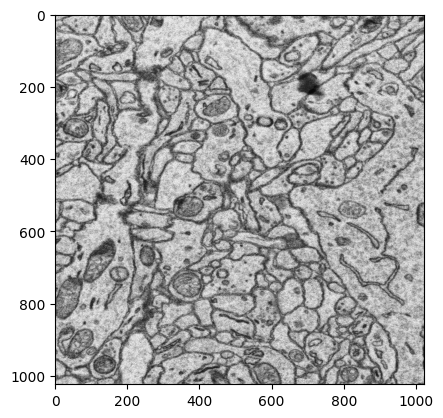

In [25]:
plt.imshow(image[159,:,:], cmap='gray', vmin=0, vmax=255)

In [34]:
image_layer_sum = np.sum(image, axis=(1,2))
print(image_layer_sum)

[155433107 156565271 154948109 155956554 154739975 155844546 154425984
 154439833 157194124 154859809 158202953 158338678 160015766 159965784
 161376852 162151276 158509238 159553992 157970077 155493586 156929551
 157357553 153768833 153379190 153514899 154240185 156485496 151876727
 158717108 156161861 159186032 158671719 157792501 155809715 156831881
 155447112 157355044 157264816 152356300 159426416 155725178 155544364
 154336757 154860642 158666209 156389163 156013964 155701065 153766427
 157825797 154441827 153979014 153705835 154107694 154507237 154234865
 151742909 153089033 147384805 148175923 152349121 151292070 156810067
 153277794 153982703 153649407 153301199 153752843 154912223 155572063
 153192904 155653365 154858488 156616680 154220013 155654346 151297863
 156645867 151680148 156301151 154255145 154663445 156149198 157026013
 146211926 157583669 151234307 158664200 154313835 157120958 153963981
 154239748 145652056 153693145 147452690 149347814 153266056 155823210
 15219

In [10]:
synapse_mask = np.array(f["synapse_mask"])

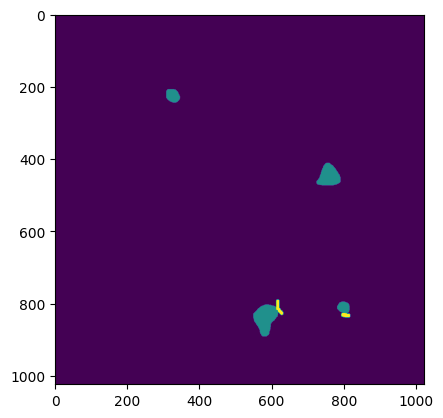

In [50]:
plt.imshow(synapse_mask[158,:,:])

In [38]:
synapse_mask[156,800:850,800:820]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1,

In [44]:
vc_edt = np.array(f["vc_edt"])

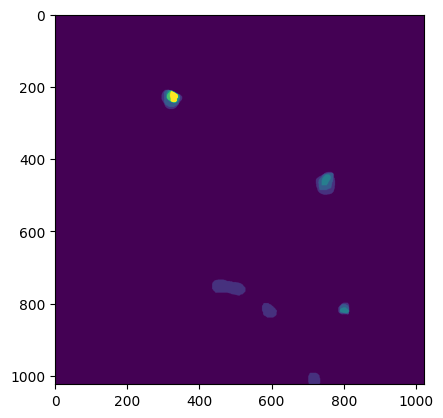

In [45]:
plt.imshow(vc_edt[156,:,:])

In [46]:
vc_edt[156,750:800,500:520]

array([[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
       [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
       [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
       [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
       [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
       [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
       [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
       [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
       [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0

In [47]:
vc_mask = np.array(f["vc_mask"])

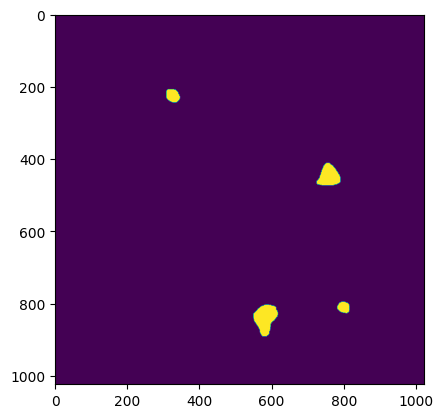

In [48]:
plt.imshow(vc_mask[158,:,:])

In [43]:
sj_mask[158,800:830,600:630]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [2]:
import numpy as np
import wkw

In [7]:
# dataset = wkw.Dataset.open("/scratch/midway3/suryakalia/datasets/hanyu/wkw/cube_3644_2391_119_1024_1024_64")
# dataset = wkw.Dataset.open("/scratch/midway3/suryakalia/datasets/hanyu/wkw")
dataset_segmentation = wkw.Dataset.open("/scratch/midway3/suryakalia/datasets/hanyu/wkw/cube_3644_2391_119_1024_1024_64/segmentation/1/")


# # Assuming that the dataset has a layer "color"
# # and the layer has the magnification 1
# layer = dataset.get_layer("segmentation")
# mag1 = layer.get_mag("1")

AttributeError: 'Dataset' object has no attribute 'get_layer'

In [27]:
dataset_color = wkw.Dataset.open("/scratch/midway3/suryakalia/datasets/hanyu/wkw/cube_3644_2391_119_1024_1024_64/color/1/")

In [29]:
# segmentation = dataset_segmentation.read((0,0,0),(1024,1024,64))
color = dataset_color.read((0,0,0),(1024,1024,64))


In [23]:
segmentation.shape

(1, 1024, 1024, 64)

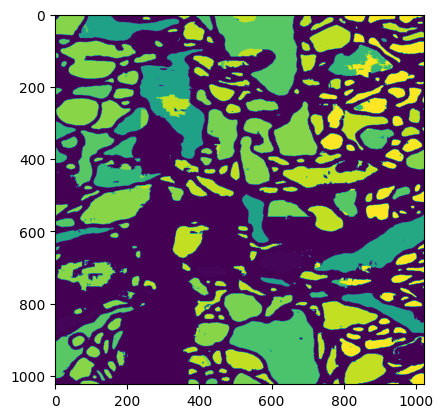

In [26]:
plt.imshow(segmentation[0,:,:,59])

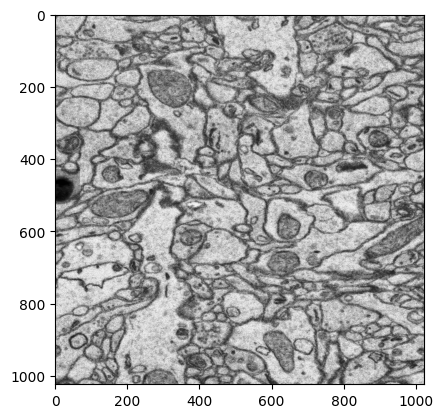

In [32]:
plt.imshow(color[0,:,:,59], cmap='gray', vmin=0, vmax=255)

In [35]:
color_layer_sum = np.sum(color, axis=(0,1,2))
print(color_layer_sum)

[159184312 157989243 154098030 155032982 156544024 157205823 152421409
 155501110 154531096 152403813 157370843 154164990 155766004 153968769
 160867951 156061279 158101654 155416092 155383066 153919442 156956655
 152944170 157474833 150811714 153770720 155059527 155275129 155391357
 156236912 154440533 158798080 158246664 158994090 157690277 156992779
 161166025 158724267 157099370 156004715 158253854 159793190 159989115
 157458162 160893836 157081764 162039373 159044218 160179495 158425960
 167155238 160078586 159497180 159580865 163418109 156850937 160415295
 158345973 160122631 159750692 160714808 157584664 165491895 163875079
 159239907]


In [36]:
image_layer_sum.index(159184312)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [44]:
count = 0
for color_sum in color_layer_sum:
  itemindex = np.where(image_layer_sum==color_sum)
  # if (len(itemindex) > 0):
  #   print(color_sum, itemindex)
  print(itemindex)
  count+=1

print(count)


(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], d

In [3]:
col_seg_path = 'precomputed://http://128.135.219.156:8000/neuroglancer/gw_p105/segmentations/fix_myelin/precomputed-150_150_0_10060_11390_913_v3'
col_seg_cv = CloudVolume(col_seg_path, mip=0, progress=False, bounded=False, fill_missing=True)
 
print(col_seg_cv.shape)

(10240, 11520, 960, 1)


In [4]:
col_img_path = 'precomputed://http://128.135.219.156:8000/neuroglancer/gw_p105/precom/image'
col_img_cv = CloudVolume(col_img_path, mip=0, progress=False, bounded=False, fill_missing=True)
 
print(col_img_cv.shape)

(21016, 23232, 960, 1)


In [12]:
col_seg_cv_crop = col_seg_cv[1150:2150, 1150:2150, 100:200, 0]
col_seg_cv_crop = col_seg_cv_crop[..., 0]
print(col_seg_cv_crop.shape)


(1000, 1000, 100)


In [15]:
with lzma.open("/scratch/midway3/suryakalia/datasets/hanyu/p105/segmentation" + ".xz", "wb") as f:
  pickle.dump(col_seg_cv_crop, f)
  tifffile.imsave("/scratch/midway3/suryakalia/datasets/hanyu/p105/segmentation"+ ".tiff", col_seg_cv_crop)

/home/suryakalia/ipykernel_1618492/4285787137.py:3: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave("/scratch/midway3/suryakalia/datasets/hanyu/p105/segmentation"+ ".tiff", col_seg_cv_crop)


In [ ]:
print(col_img_cv[300:20420, 300:23080, 0:, 0].shape)

In [5]:
col_synapse_path = 'precomputed://http://128.135.219.156:8000/neuroglancer/gw_p105/synapses/full_output_theta/class_predictions'

col_synapse_cv = CloudVolume(col_synapse_path, mip=0, progress=False, bounded=False, fill_missing=True)
 
print(col_synapse_cv.shape)

(10060, 11390, 913, 1)


In [11]:
col_synapse_cv_crop = col_synapse_cv[1150:2150, 1150:2150, 100:200, 0]
col_synapse_cv_crop = col_synapse_cv_crop[..., 0]
print(col_synapse_cv_crop.shape)

(1000, 1000, 100)


In [14]:
with lzma.open("/scratch/midway3/suryakalia/datasets/hanyu/p105/synapse" + ".xz", "wb") as f:
  pickle.dump(col_synapse_cv_crop, f)
  tifffile.imsave("/scratch/midway3/suryakalia/datasets/hanyu/p105/synapse"+ ".tiff", col_synapse_cv_crop)

/home/suryakalia/ipykernel_1618492/690534877.py:3: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave("/scratch/midway3/suryakalia/datasets/hanyu/p105/synapse"+ ".tiff", col_synapse_cv_crop)


In [8]:
col_img_cv_crop = col_img_cv[2300:4300, 2300:4300, 100:200, 0]
col_img_cv_crop = col_img_cv_crop[..., 0]
print(col_img_cv_crop.shape)

(2000, 2000, 100)


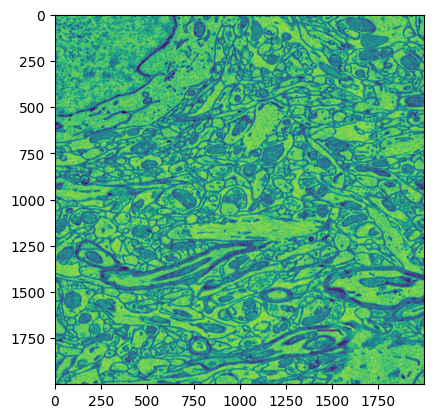

In [9]:
plt.imshow(col_img_cv_crop[:, :, 0])

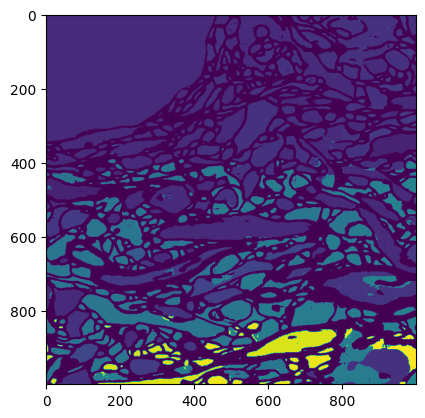

In [13]:
plt.imshow(col_seg_cv_crop[:,:,0])

In [22]:
with lzma.open("/scratch/midway3/suryakalia/datasets/hanyu/p105/img_full_res" + ".xz", "wb") as f:
  pickle.dump(col_img_cv_crop, f)
  tifffile.imsave("/scratch/midway3/suryakalia/datasets/hanyu/p105/img_full_res"+ ".tiff", col_img_cv_crop)

/home/suryakalia/ipykernel_2689596/3813633582.py:3: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave("/scratch/midway3/suryakalia/datasets/hanyu/p105/img_full_res"+ ".tiff", col_img_cv_crop)


In [23]:
# Down sample full res image by 2x
col_img_cv_crop_downsampled = cv2.pyrDown(col_img_cv_crop)
print(col_img_cv_crop_downsampled.shape)

(1000, 1000, 100)


In [24]:
with lzma.open("/scratch/midway3/suryakalia/datasets/hanyu/p105/img" + ".xz", "wb") as f:
  pickle.dump(col_img_cv_crop_downsampled, f)
  tifffile.imsave("/scratch/midway3/suryakalia/datasets/hanyu/p105/img"+ ".tiff", col_img_cv_crop_downsampled)

/home/suryakalia/ipykernel_2689596/264271380.py:3: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave("/scratch/midway3/suryakalia/datasets/hanyu/p105/img"+ ".tiff", col_img_cv_crop_downsampled)


In [18]:
col_synapse_cv.dtype

dtype('uint8')

In [19]:
col_seg_cv.dtype

dtype('uint32')

In [20]:
col_img_cv.dtype

dtype('uint8')

In [27]:
plt.imshow(col_img_cv[:,:,0])

ValueError: 7bit is not currently supported. Supported Options: None, bz2, bzip2, gzip, br, zstd, xz, lzma

In [2]:
with lzma.open("/home/suryakalia/documents/summer/tests/hanyu_analysis/overlap_neuron_img_combined.xz", "rb") as f:
  overlap_img = pickle.load(f)

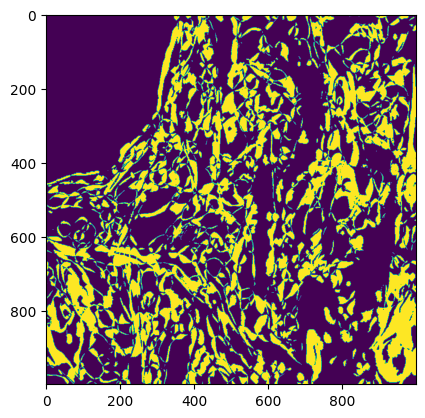

In [3]:
plt.imshow(overlap_img[0,:,:])